In [108]:
import pickle

In [128]:
dataset_gens = ['hse',
                'astro',
                'hepth',
#                 'facebook'
#                 'blog_catalog',
                ]
mods = ["gcn", "gat", "graphsage", "Jonnee"]

In [129]:
from matplotlib import pyplot as plt
import numpy as np

In [130]:
import numpy as np

In [131]:
def take_metric(logs, name):
    r = np.zeros_like(logs[list(logs.keys())[0]][name])
    for s in logs:
        r += np.array(logs[s][name]) / len(logs)
    return r

In [132]:
mods = ["gcn", "gat", "graphsage", "Jonnee"]
res = {}
for d in dataset_gens:
    res[d] = {}
    for m in mods:
        if m == "Jonnee" and d not in ["astro", "hepth"]:
            p = f"results_time_complexity3/{m}_{d}_logs.pickle"
        else:
            p = f"results_time_complexity/{m}_{d}_logs.pickle"
        with open(p, 'rb') as f:
            logs = pickle.load(f)
        
        r = np.zeros_like(logs[list(logs.keys())[0]]['train_elbo'])
        for s in logs:
            r += np.array(logs[s]['train_elbo']) + (0 if m != "Jonnee" else np.array(logs[s]['train_added'])) / len(logs)
        res[d][m] = {}
        res[d][m]['loss'] = r
        res[d][m]['accuracy_train'] = take_metric(logs, "accuracy_train")
        
        res[d][m]['accuracy_test'] = take_metric(logs, "accuracy_test")
        res[d][m]['roc_test'] = take_metric(logs, "roc_test")
        res[d][m]['ap_test'] = take_metric(logs, "ap_test")
        res[d][m]['f1_test'] = take_metric(logs, "f1_test")
        
        r = np.zeros_like(logs[list(logs.keys())[0]]['time_per_epoch'])
        for s in logs:
            r += np.array(logs[s]['time_per_epoch']) / len(logs)
        res[d][m]['time_per_epoch'] = np.cumsum(r)

In [133]:
mods = ["GCN", "GAT", "GraphSAGE", "JONNEE"]

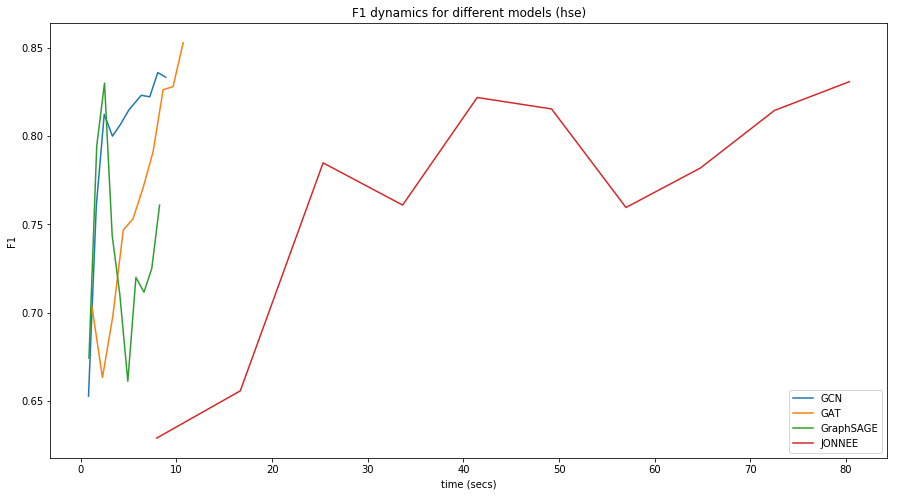

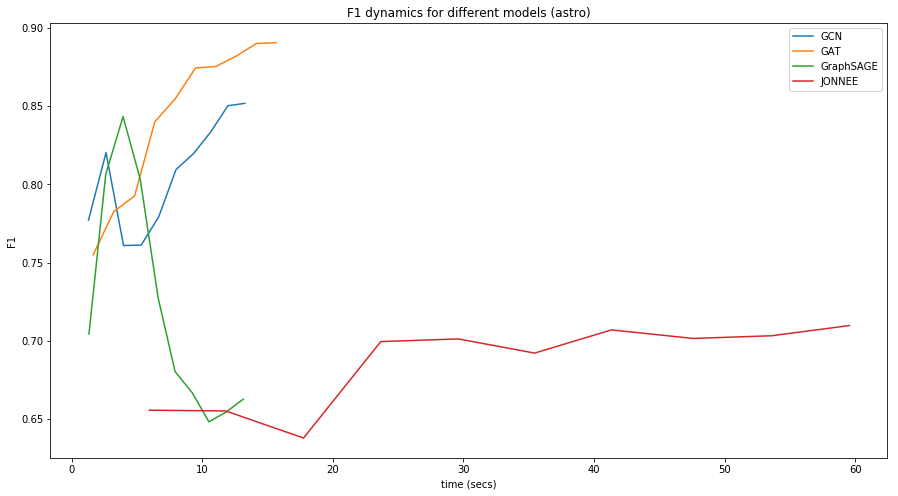

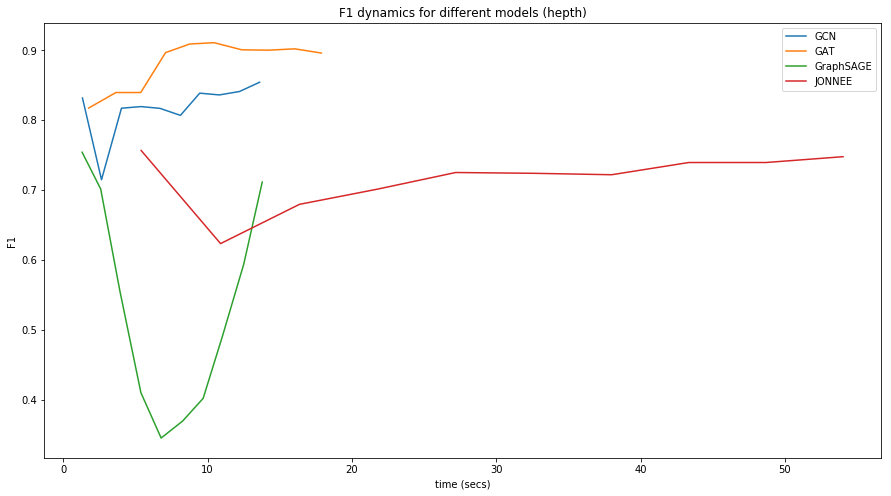

In [137]:
# reset_params = dict(n_hidden=32, n_latent=16,
# dropout=0.5, dropout_dual=0.5,
# mask=-0.1, mask_dual=2e-2,
# lambd=0.005, lambd_dual=0.2, co_reg=0.1, verbose=False)

plt.rcParams["figure.figsize"] = [15, 8]
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['f1_test'][:10], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['f1_test'][:10], label=m)
    plt.title(f"F1 dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 40)
    plt.xlabel("time (secs)")
    plt.ylabel("F1")
    plt.savefig(f"{d}_loss.png", dpi=100)
    
    plt.savefig(f"{d}_jonnee_f1.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

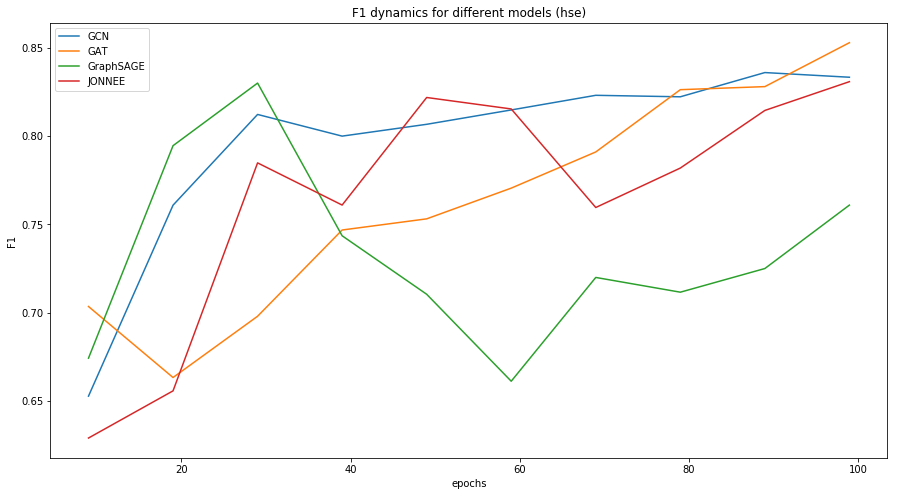

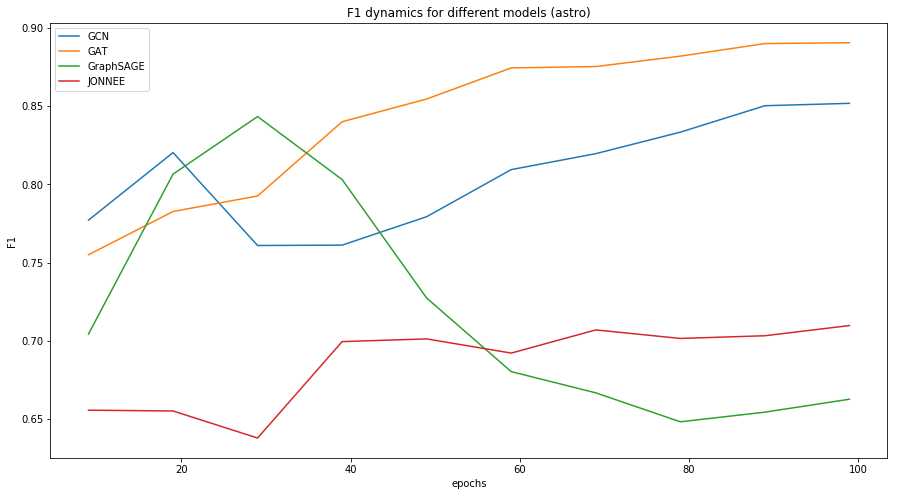

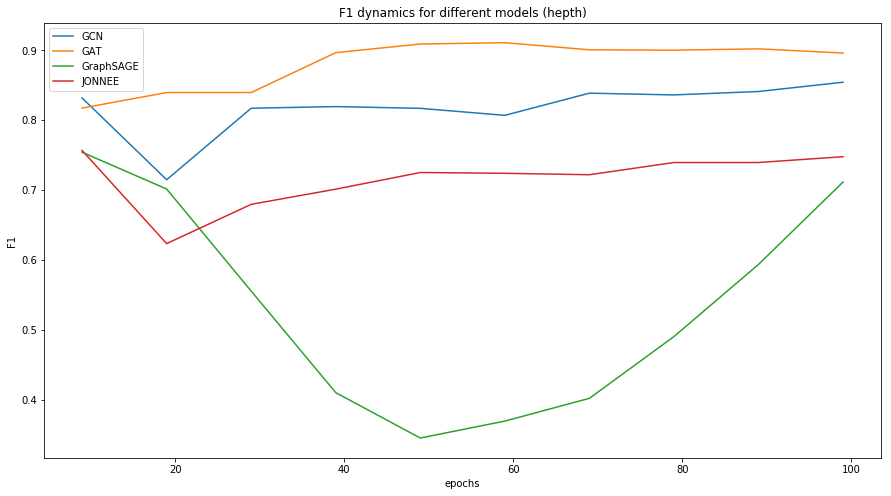

In [138]:
plt.rcParams["figure.figsize"] = [15, 8]
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(np.arange(9, 101, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['f1_test'][:10], label=m)
        except:
            plt.plot(np.arange(9, 101, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['f1_test'][:10], label=m)
    plt.title(f"F1 dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 40)
    plt.xlabel("epochs")
    plt.ylabel("F1")
    plt.savefig(f"{d}_loss.png", dpi=100)
    
    plt.savefig(f"{d}_jonnee_f1_epochs.png", dpi=100)
    plt.show()

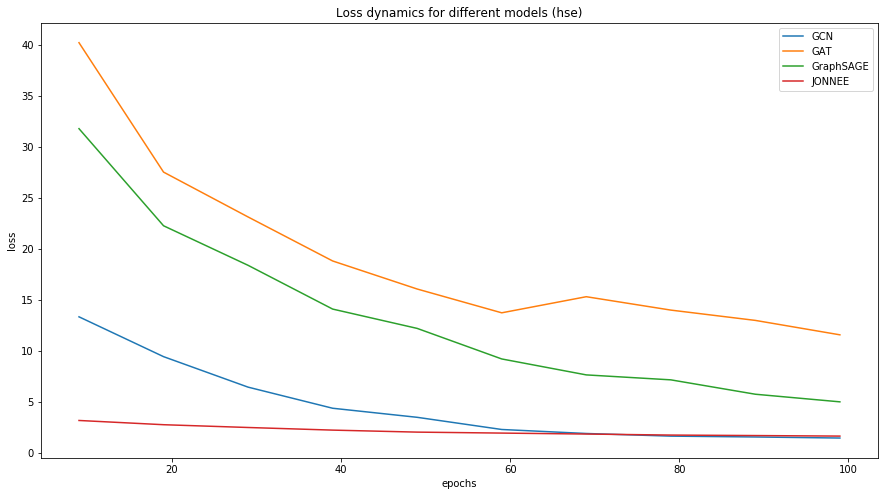

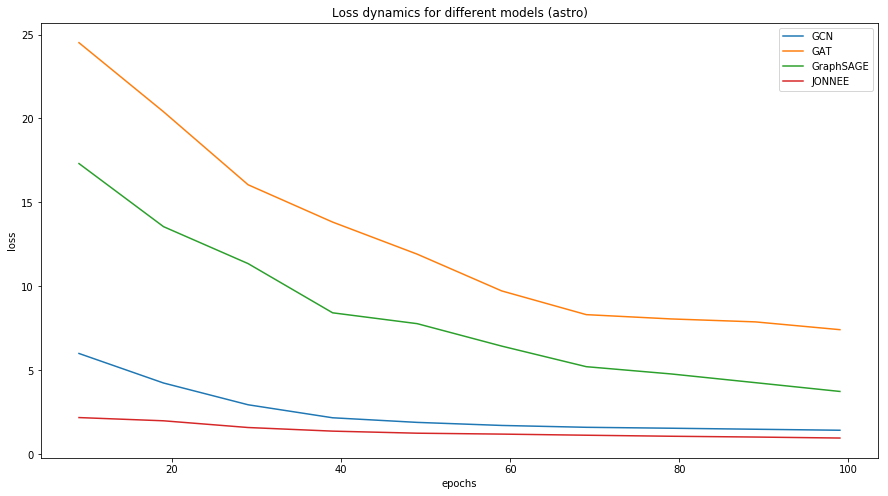

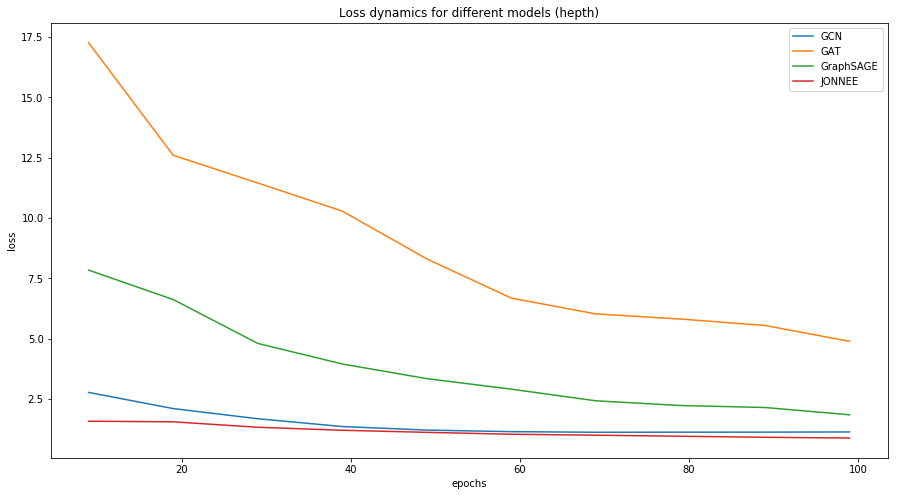

In [143]:
plt.rcParams["figure.figsize"] = [15, 8]
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(np.arange(9, 101, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['loss'][:10], label=m)
        except:
            plt.plot(np.arange(9, 101, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['loss'][:10], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 40)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.savefig(f"{d}_loss.png", dpi=100)
    
    plt.savefig(f"{d}_jonnee_loss.png", dpi=100)
    plt.show()

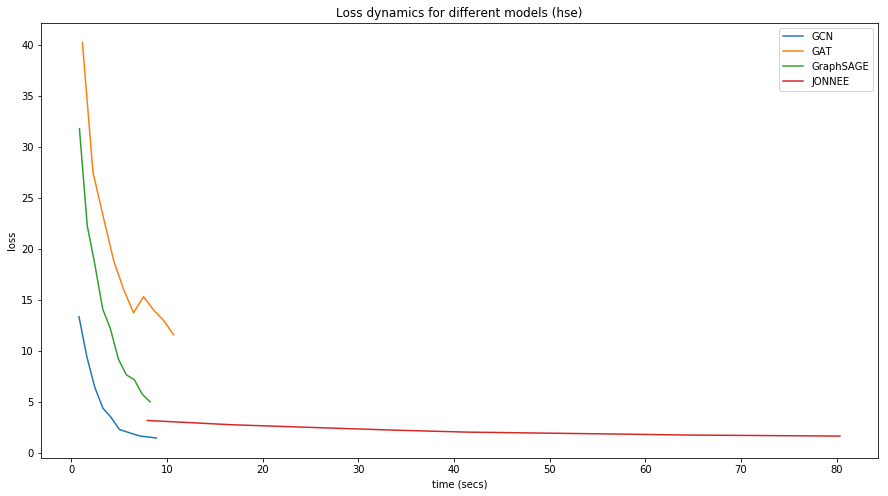

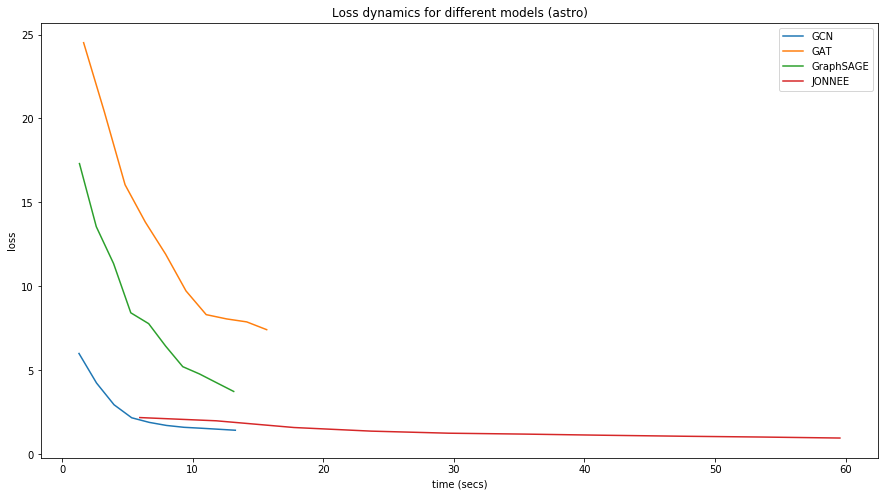

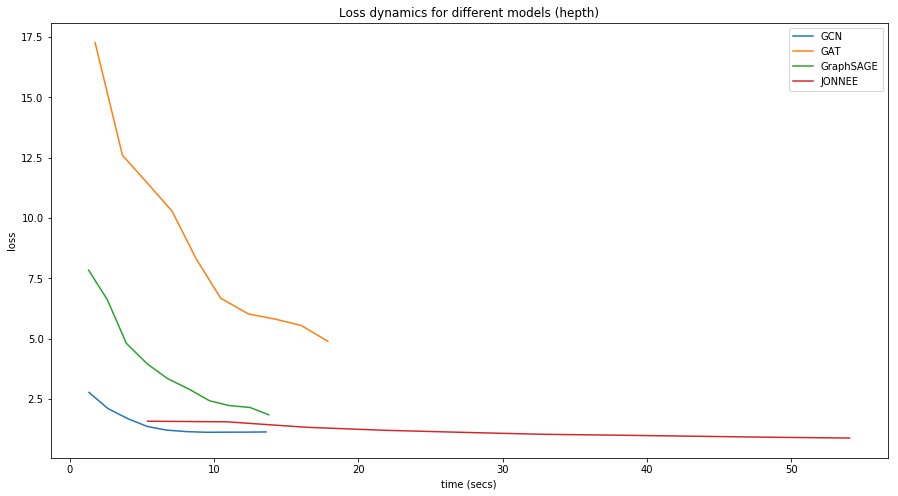

In [144]:
plt.rcParams["figure.figsize"] = [15, 8]
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['loss'][:10], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['loss'][:10], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 40)
    plt.xlabel("time (secs)")
    plt.ylabel("loss")
    plt.savefig(f"{d}_loss.png", dpi=100)
    
#     plt.savefig(f"{d}_jonnee_loss_time.png", dpi=100)
    plt.show()

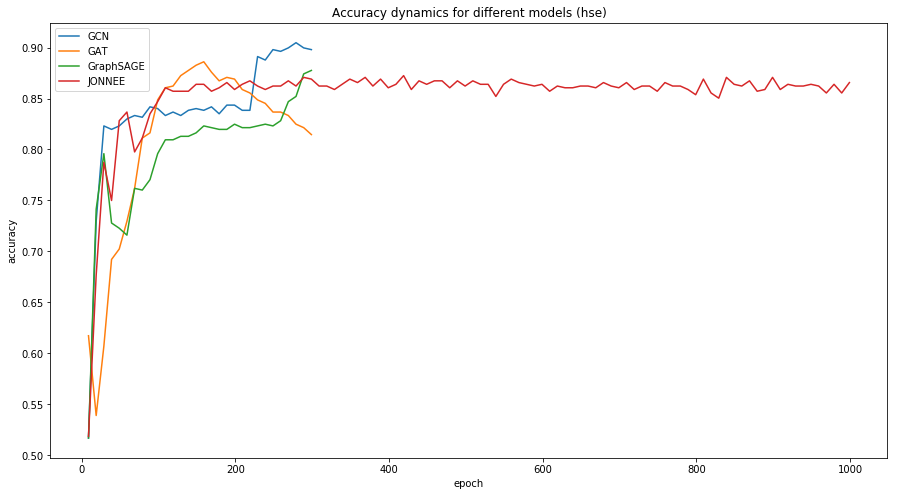

In [96]:
# reset_params = dict(n_hidden=32, n_latent=16,
# dropout=0.5, dropout_dual=0.5,
# mask=-0.1, mask_dual=2e-2,
# lambd=0.005, lambd_dual=0.2, co_reg=0.1, verbose=False)

plt.rcParams["figure.figsize"] = [15, 8]
for d in dataset_gens[:1]:
    for m in mods:
        try:
            plt.plot(np.arange(9, 301, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(np.arange(9, 1001, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Accuracy dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 40)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    
    plt.savefig(f"{d}_jonnee_acc_full_epochs.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

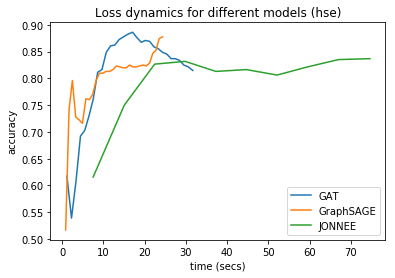

In [98]:
# reset_params = dict(n_hidden=32, n_latent=16,
# dropout=0.5, dropout_dual=0.5,
# mask=-0.1, mask_dual=2e-2,
# lambd=0.005, lambd_dual=0.2, co_reg=0.1, verbose=False)


for d in dataset_gens[:1]:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 301, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 30)
    plt.xlabel("time (secs)")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

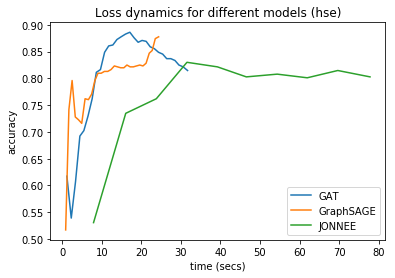

In [89]:

# reset_params = dict(n_hidden=32, n_latent=16,
# dropout=0.5, dropout_dual=0.5,
# mask=-0.1, mask_dual=2e-2,
# lambd=0.005, lambd_dual=0.2, co_reg=0.01, verbose=False)


for d in dataset_gens[:1]:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 301, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 30)
    plt.xlabel("time (secs)")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

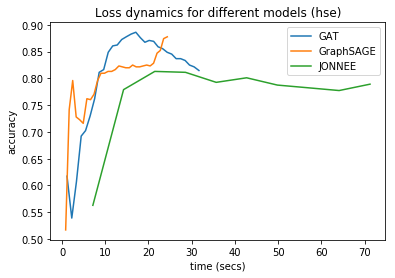

In [83]:
for d in dataset_gens[:1]:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 301, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 30)
    plt.xlabel("time (secs)")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

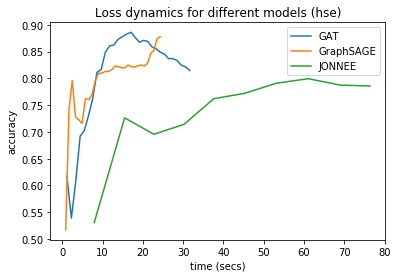

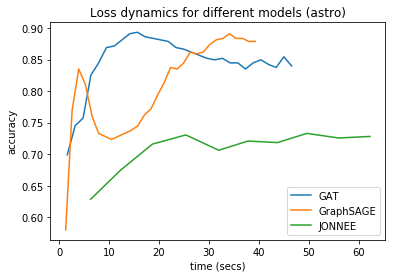

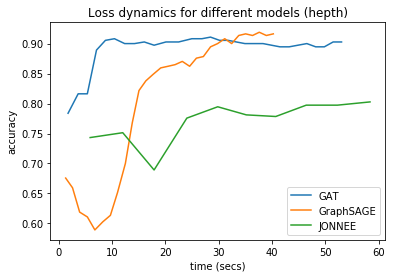

In [57]:
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 301, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 30)
    plt.xlabel("time (secs)")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()

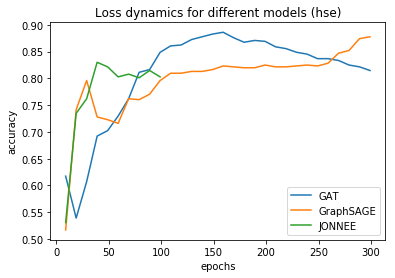

KeyError: 'astro'

In [90]:
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(np.arange(9, 301, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
        except:
            plt.plot(np.arange(9, 101, 10), res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_test'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
#     plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 30)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()
    
#     for m in mods:
#         plt.plot(res[d][m]['accuracy_test'], label=m)
# #     plt.title(f"Test accuracy dynamics for different models ({d})")
#     plt.legend()
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
#     plt.show()
    

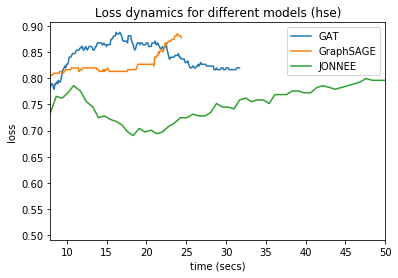

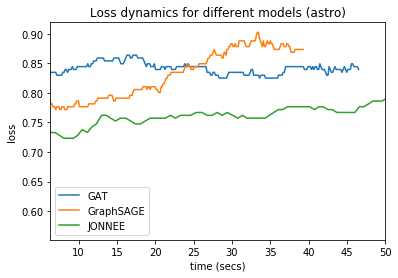

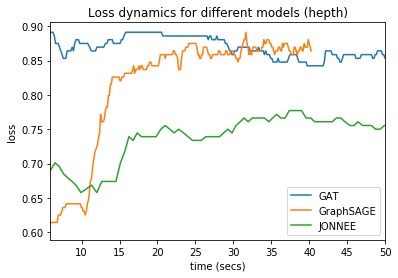

In [58]:
for d in dataset_gens:
    for m in mods:
        try:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_train'], label=m)
        except:
            plt.plot(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'], res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['accuracy_train'], label=m)
    plt.title(f"Loss dynamics for different models ({d})")
    plt.legend()
    plt.xlim(min(res[d][m.lower() if m != 'JONNEE' else 'Jonnee']['time_per_epoch'][np.arange(9, 101, 10)]), 50)
    plt.xlabel("time (secs)")
    plt.ylabel("loss")
    plt.savefig(f"{d}_loss.png", dpi=100)
    plt.show()

In [97]:
import pandas as pd
import json

with open("results_wo_problem/gat_blog_catalog.json") as f:
    df = pd.DataFrame(json.load(f))
    df["mn"] = df['0'].map(lambda x: x.get("mean")).round(3).astype(str)
    df["sd"] = df['0'].map(lambda x: x.get("std"))
    df = df.drop('0', axis=1)

In [98]:
df.reindex(["accuracy", "roc_score", "ap_score", "f1_score"]).mn


accuracy     0.647
roc_score    0.778
ap_score     0.681
f1_score     0.737
Name: mn, dtype: object

In [99]:
with open("results_wo_problem/graphsage_blog_catalog.json") as f:
    df = pd.DataFrame(json.load(f))
    df["mn"] = df['0'].map(lambda x: x.get("mean")).round(3).astype(str)
    df["sd"] = df['0'].map(lambda x: x.get("std"))
    df = df.drop('0', axis=1)

In [100]:
df.reindex(["accuracy", "roc_score", "ap_score", "f1_score"]).mn


accuracy     0.649
roc_score    0.767
ap_score     0.681
f1_score     0.739
Name: mn, dtype: object